In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,QuantumRegister,ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

**Double Slit Experiment**

Here is the qiskit code for the quantum version of the Double Slit experiment i.e. Single particle interference. If we send classical particlea through 2 slits, we observe only 2 bright regions corresponding to the 2 slits. On the other hand if a classical wave is sent through,then alternate light and dark bands are obsered. similarly when we send a single photon through 2 slits we find alternate light and dark bands are produced. The problem however arise when we place a detector to test which slit the photon went through and this time we notice that only 2 bright spots are formed as in the first case that of particles. So somehow photons act like a particle as well as a wave, and observation makes the wave act like a particle. This dual behavior is called the Wave Particle Duality.

Implementing this using the Mach Zehnder Interferometer experiment(https://en.wikipedia.org/wiki/Mach%E2%80%93Zehnder_interferometer)

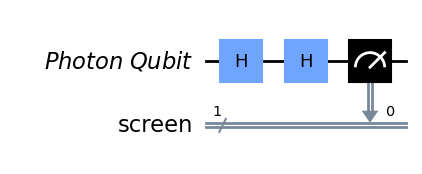

In [4]:
qr=QuantumRegister(1,name="Photon Qubit")
cr=ClassicalRegister(1,name="screen")
qc=QuantumCircuit(qr,cr)
#Creating the superposition of paths
qc.h(0)
#Combining the paths
qc.h(0)
qc.measure(0,0)
qc.draw("mpl")

In [5]:
from qiskit_aer import AerSimulator
backend=AerSimulator()
results=backend.run(qc).result().get_counts()
print(results)
#Our result should be all 0s, which represents successful Interference

{'0': 1024}


To see which path the photon went through:

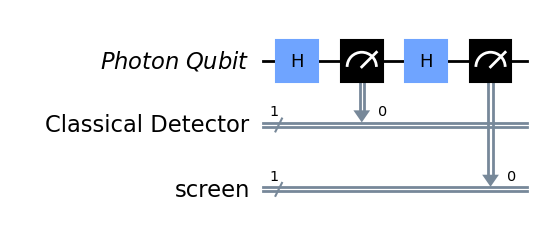

In [11]:
#Here it would appear the photon went through only one slit
cr2=ClassicalRegister(1,name="Classical Detector")
qc2=QuantumCircuit(qr,cr2,cr)
#Creating Superposition of the paths
qc2.h(0)
# Detecting the path(Collapsing the Qubit)
qc2.measure(0,0)
#Applying another hadamard
qc2.h(0)
#measuring again
qc2.measure(0,1)
qc2.draw("mpl")

In [16]:
from qiskit.result import marginal_counts
results=backend.run(qc2).result().get_counts()
marginal_count=marginal_counts(results,indices=[1])
print(marginal_count)
#instead of being 0 everytime they have an equal chance of being 0 and 1 equally

{'0': 504, '1': 520}


Modelling our detector as a Quantum System:

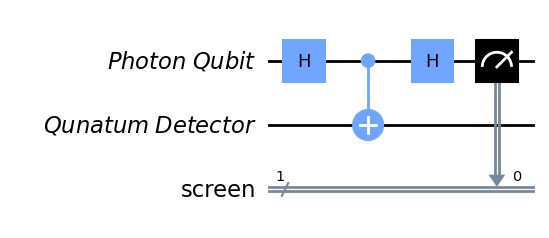

In [18]:
qr2=QuantumRegister(1,name="Qunatum Detector")
qc3=QuantumCircuit(qr,qr2,cr)
#Creating Superposition of the paths
qc3.h(0)
# Entangling photon qubit with detector qubit
qc3.cnot(0,1)
#Applying another hadamard
qc3.h(0)
#measuring again
qc3.measure(0,0)
qc3.draw("mpl")

In [22]:
results=backend.run(qc3).result().get_counts()

print(results)

{'0': 509, '1': 515}


So again we have equal probability of getting 0 and 1. So as we can see just entangling the qubit has same effect as adding a classical detector

So, it is not us observing the photon that collapses it, rather it is us placing anything in its path that entangles with it, thereby restricting the photon form interefering with itself.

The photon's path information copying to anything in its environement retricts its interference with itself. This is Decoherence. So if the qubit is entangled with just one other system,that is not under our control, we loose the ability to make use of the wave like property of the qubits that is needed for Quantum Information and Processing.
But it is not that it is not that interacting with anything leads to this collapse. It is only if our qubit becomes entangled. For eg if we had used a Controlled Z gate instead of CNOT gate, the result would have been all zeroes as CZ is not an entangling gate.